In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from pylab import rcParams
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import normalize
from statsmodels.tsa.arima.model import ARIMA

#from nsepy import get_history
from datetime import date

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ue19cs312-assignment/sample_submission.csv
/kaggle/input/ue19cs312-assignment/submission.csv
/kaggle/input/ue19cs312-assignment/train.csv
/kaggle/input/ue19cs312-assignment/test.csv


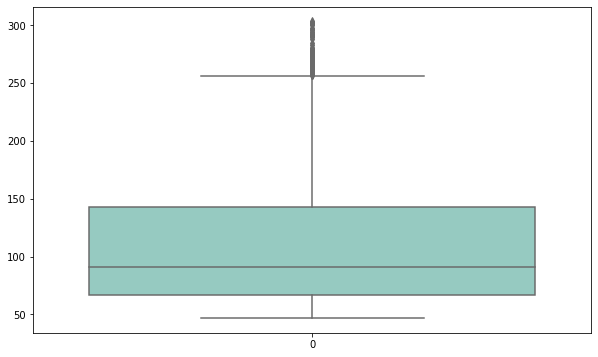

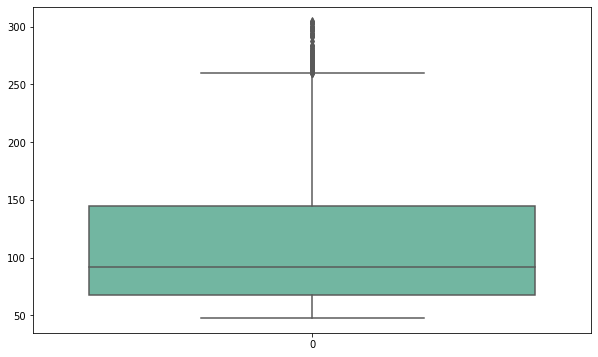

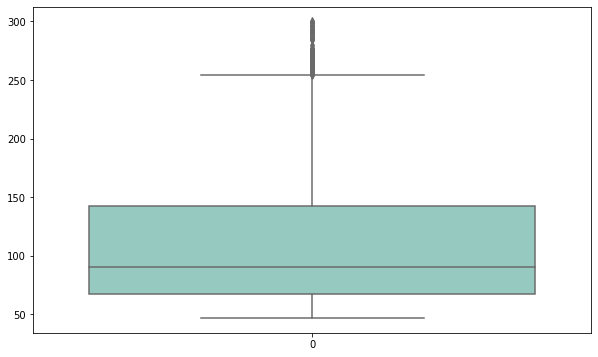

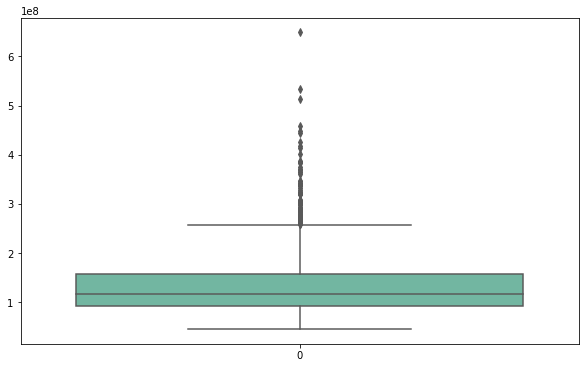

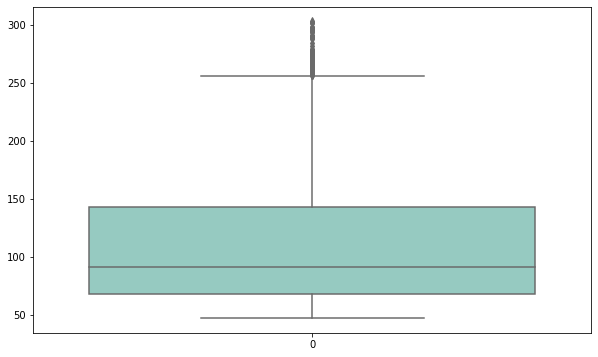

In [2]:
df = pd.read_csv("/kaggle/input/ue19cs312-assignment/train.csv")
dft = pd.read_csv("/kaggle/input/ue19cs312-assignment/test.csv")
dfs = pd.read_csv("/kaggle/input/ue19cs312-assignment/submission.csv")
# boxplot for all the columns 
# helpful in finding all the outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Open'],palette='Set3') #palette sets the colour scheme
plt.show() 
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['High'],palette='Set2') #palette sets the colour scheme
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Low'],palette='Set3') #palette sets the colour scheme
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Volume'],palette='Set2') #palette sets the colour scheme
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Close'],palette='Set3') #palette sets the colour scheme
plt.show()

In [3]:
# to check the number of null values in the dataset
df.isnull().sum() 
# this dataset has no null values 
df.dropna()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...,...
1495,23-07-2021,299.658540,301.995035,298.400415,71447400,301.675507
1496,26-07-2021,301.096392,304.211720,299.958083,72434100,302.534241
1497,27-07-2021,302.793811,302.973565,295.664509,104818600,298.100861
1498,28-07-2021,294.186727,298.500271,289.653510,118931200,294.526215


In [4]:
''' # check for outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)
df_outlier = df[~((df < (Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

df_outlier.shape
print(df_outlier)'''

' # check for outliers \nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3-Q1\nprint(IQR)\ndf_outlier = df[~((df < (Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]\n\ndf_outlier.shape\nprint(df_outlier)'

<AxesSubplot:xlabel='Year', ylabel='count'>

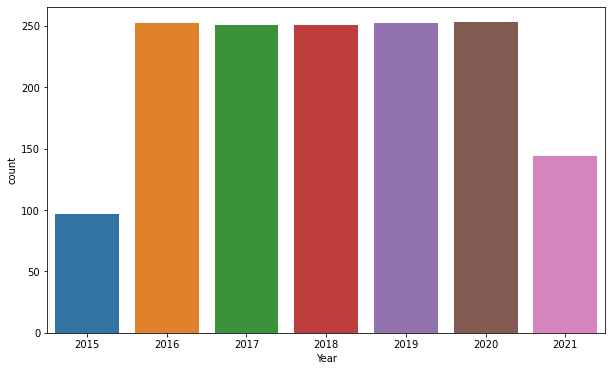

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
df['Date']= pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
sns.countplot(x= 'Year',data = df)

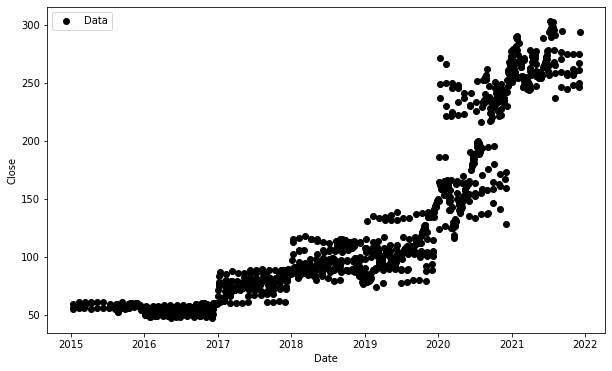

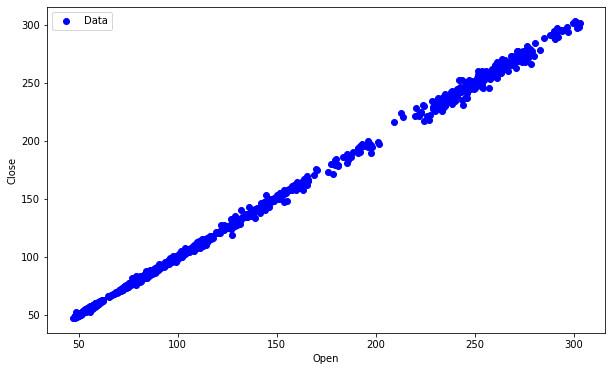

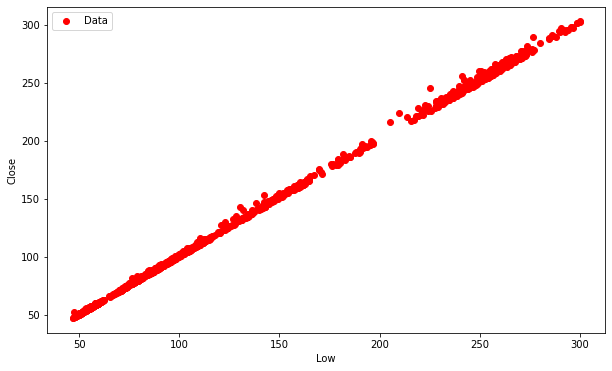

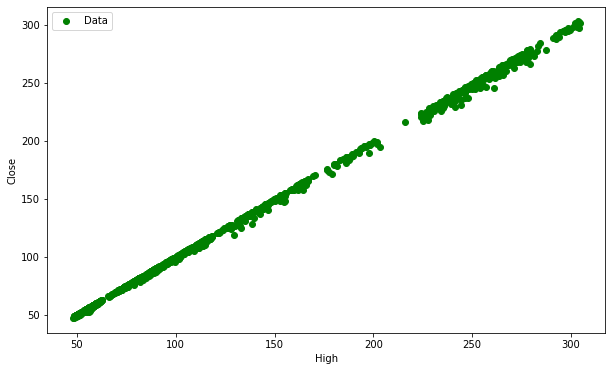

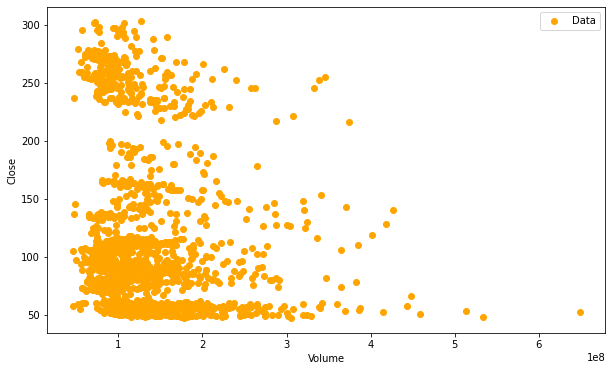

In [6]:
# scatter plot of the dataset
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Date'], df['Close'], color= 'black', label= 'Data') # plotting the initial datapoints 
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], color= 'blue', label= 'Data')
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Low'], df['Close'], color= 'red', label= 'Data')
plt.xlabel('Low')
plt.ylabel('Close')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['High'], df['Close'], color= 'green', label= 'Data')
plt.xlabel('High')
plt.ylabel('Close')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], color= 'orange', label= 'Data')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.show()

<AxesSubplot:>

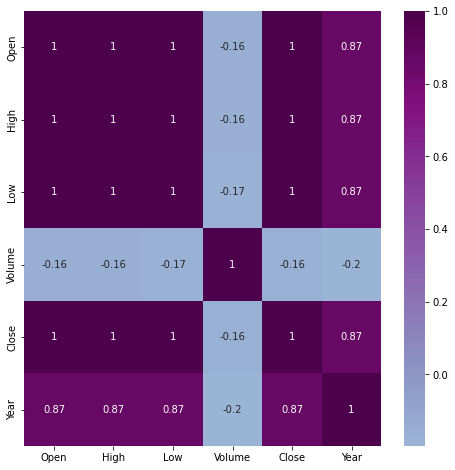

In [7]:
# heatmap of the dataset 
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='BuPu',center=0)

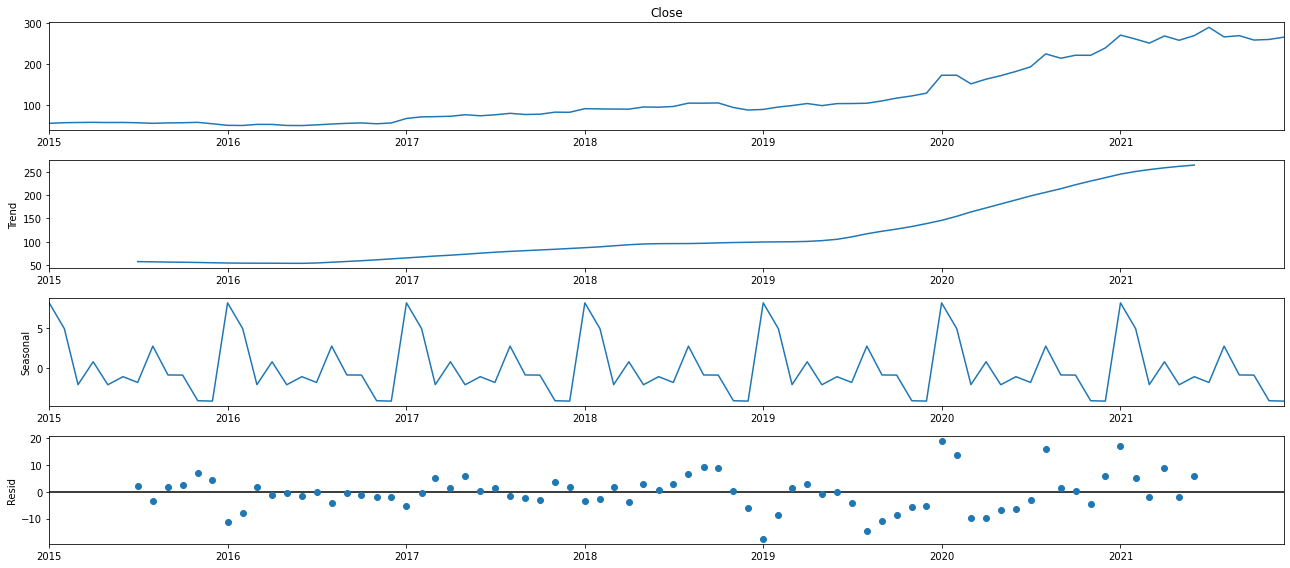

In [8]:
# plotting the components of timeseries ie. Trend, Seasonal and Residuals
y = df.set_index('Date')
y.index
y = y['Close'].resample('MS').mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
# normalizing was done, this increased the rmse value. 
'''# normalization 
x_array = np.array([df['High'],df['Low'],df['Volume'],df['Open']])
normalized_x = normalize(x_array)
df = df.drop(['High','Low','Volume','Open'],axis=1)
df.insert(1,'Open',normalized_x[3])
df.insert(2,'High',normalized_x[0])
df.insert(3,'Low',normalized_x[1])
df.insert(4,'Volume',normalized_x[2])
print(df)'''

"# normalization \nx_array = np.array([df['High'],df['Low'],df['Volume'],df['Open']])\nnormalized_x = normalize(x_array)\ndf = df.drop(['High','Low','Volume','Open'],axis=1)\ndf.insert(1,'Open',normalized_x[3])\ndf.insert(2,'High',normalized_x[0])\ndf.insert(3,'Low',normalized_x[1])\ndf.insert(4,'Volume',normalized_x[2])\nprint(df)"

In [10]:
'''#print(dft)
x_array1 = np.array([dft['High'],dft['Low'],dft['Volume'],dft['Open']])
normalized_x1 = normalize(x_array1)
# print(dft)
# dft = dft.drop(['High','Low','Volume','Open'],axis=1)
dft.insert(1,'Open1',normalized_x1[3])
dft.insert(2,'High1',normalized_x1[0])
dft.insert(3,'Low1',normalized_x1[1])
dft.insert(4,'Volume1',normalized_x1[2])
# print(normalized_x1)
dft = dft.drop(['High','Low','Volume','Open'],axis=1)
print(dft)
dft = dft.rename(columns={"Open1": "Open", "High1": "High" , "Low1": "Low", "Volume1": "Volume"})'''

'#print(dft)\nx_array1 = np.array([dft[\'High\'],dft[\'Low\'],dft[\'Volume\'],dft[\'Open\']])\nnormalized_x1 = normalize(x_array1)\n# print(dft)\n# dft = dft.drop([\'High\',\'Low\',\'Volume\',\'Open\'],axis=1)\ndft.insert(1,\'Open1\',normalized_x1[3])\ndft.insert(2,\'High1\',normalized_x1[0])\ndft.insert(3,\'Low1\',normalized_x1[1])\ndft.insert(4,\'Volume1\',normalized_x1[2])\n# print(normalized_x1)\ndft = dft.drop([\'High\',\'Low\',\'Volume\',\'Open\'],axis=1)\nprint(dft)\ndft = dft.rename(columns={"Open1": "Open", "High1": "High" , "Low1": "Low", "Volume1": "Volume"})'

Multivariate Regression is a supervised machine learning algorithm involving multiple data variables for analysis
A Multivariate regression is an extension of multiple regression with one dependent variable and multiple independent variables.
Based on the number of independent variables, we try to predict the output.
1. Assumptions: 4 main assumptions are as follows:
* Linearity: The relationship between X and the mean of Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.
2. Model Chosen with Rationale: The model is multivariate regression. This is chosen when we have more than one independent variable, and simple linear regression does not work. his will further help in understanding the correlation between dependent and independent variables. This method seems to work well when the n value is considerably small, where n is the number of entries. 
3. Parameters : The dependent parameters is 'Close' and the independent parameters are 'Open','Low','High' and 'Volume'

In [11]:
# Regression model 
# rmse = 1.44337
reg = sk.linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
df =df.drop(['Year'],axis= 1)
X = np.array(df.drop(['Close','Date'], axis = 1))
y = np.array(df['Close'])
# print(X,y)
reg.fit(X,y)
x_t = np.array(dft.drop(['Close','Date'],axis = 1))
pred = reg.predict(x_t)
dfs['Close'] = pred
dfs.to_csv("submission.csv",index = False)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
y = df['Close']
poly = PolynomialFeatures(degree=2)
# degree = 1,2,3,4 was done. Out of which 1  was the best, indicating linear regression is the most suitable solution in this case. 
variables = df.drop(['Close','Date'], axis = 1)
poly_variables = poly.fit_transform(variables)
regression = linear_model.LinearRegression()
model = regression.fit(poly_variables, y)
x_t = dft.drop(['Close','Date'],axis = 1)
ans =  poly.fit_transform(x_t)
pred = model.predict(ans)
# dfs['Close'] = pred
# dfs.to_csv("submission.csv",index = False)

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 
ARIMA models aim to describe the autocorrelations in the data.
1. Assumptions: 2 main asumptions are as follows
* Data should be stationary – by stationary it means that the properties of the series doesn’t depend on the time when it is captured. A white noise series and series with cyclic behavior can also be considered as stationary series.
* Data should be univariate – ARIMA works on a single variable. Auto-regression is all about regression with the past values.
2. Model Chosen with Rationale: The model is ARIMA. This is chosen because the data given is non-stationary. The number of times you difference a variable until it achieves stationarity. If the data is already stationary you run an ARMA model
3. Parameters: The parameter used in this model is 'Low'. The same was done for all parameters. 'Volume' had the worst results and 'Low' had the best results.

In [13]:
# Timeseries model
# rmse = 5.55737
train_ar = df['Low'].values
test_ar = dft['Low'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
# dfs['Close'] = predictions 
# dfs.to_csv("submission.csv",index = False)

<class 'list'>


Comparison between Regression and Time Series models
1. Based on validation performance metrics
The RMSE value for the regression model was 1.44337 and the RMSE value for the timeseries model was 5.55737.
From this we can conclude that the linear regression model is the better model (having a lesser RMSE )
2. Which model is more suitable for the data? (account for not just best performance metrics, but handling of fluctuations of data as well)
From the Exploratory Data Analysis, we learnt that apart from 'Volume' all the other columns have a linear relationship with 'Close'. Thus making linear regression the best fit model.
3. Reasoning for what model is chosen to predict test (hidden) data
We tried polynomial regression for degree 1, 2, 3 and 4. Out of which 1  was the best, indicating linear regression is the most suitable solution in this case. 

